<a href="https://colab.research.google.com/github/jonatas06ap/Metricas-CurvaROC_ML/blob/main/Metricas%26CurvaRoic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

In [19]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

import numpy as np

import seaborn as sns

import pandas as pd

In [4]:
tf.__version__

'2.19.0'

In [5]:
%load_ext tensorboard

In [6]:
logdir='log'

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8946 - loss: 0.3474 - val_accuracy: 0.9837 - val_loss: 0.0482
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9851 - loss: 0.0469 - val_accuracy: 0.9911 - val_loss: 0.0285
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.9889 - val_loss: 0.0344
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9929 - loss: 0.0234 - val_accuracy: 0.9885 - val_loss: 0.0392
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 33ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9925 - val_loss: 0.0244


In [14]:
y_true=test_labels
y_pred=model.predict(test_images)

y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [15]:
classes=[0,1,2,3,4,5,6,7,8,9]

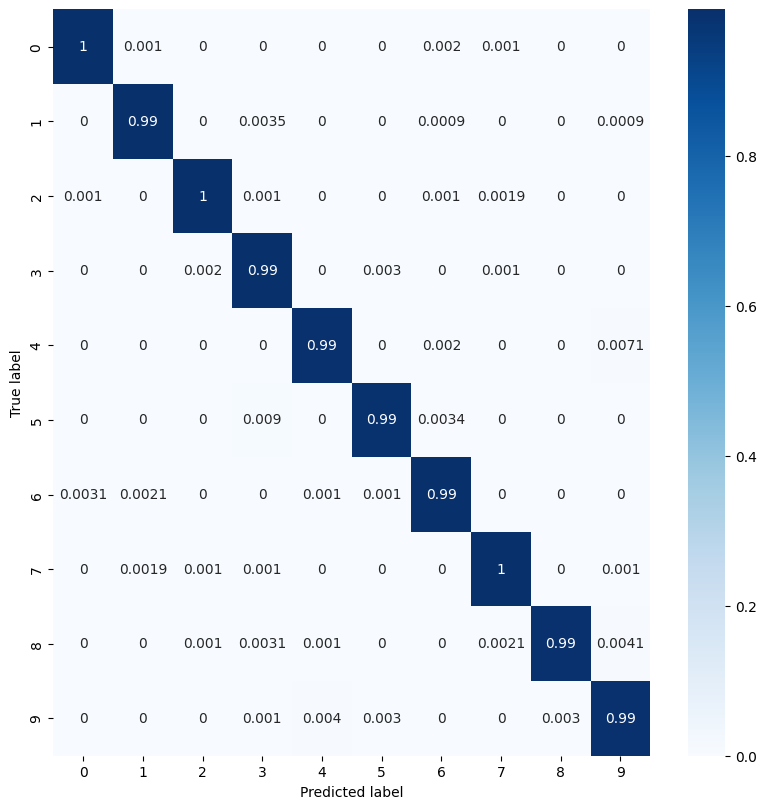

In [25]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=4)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Calculos das métricas

Valores da matriz de confusão

In [29]:
vp = []
vn = []
fp = []
fn = []

all_p = np.trace(con_mat)

sum_fp = 0
sum_fn = 0

for idx in range(len(classes)):
  vp.append(con_mat[idx][idx])
  vn.append(all_p - con_mat[idx][idx])
  for i in range(len(classes)):
    sum_fp += con_mat[i][idx]
    sum_fn += con_mat[idx][i]
  fp.append(sum_fp)
  fn.append(sum_fn)
  sum_vn = 0
  sum_fn = 0

print(vp)
print(vn)
print(fp)
print(fn)

[np.int32(976), np.int32(1129), np.int32(1027), np.int32(1004), np.int32(973), np.int32(881), np.int32(951), np.int32(1023), np.int32(963), np.int32(998)]
[np.int64(8949), np.int64(8796), np.int64(8898), np.int64(8921), np.int64(8952), np.int64(9044), np.int64(8974), np.int64(8902), np.int64(8962), np.int64(8927)]
[np.int32(980), np.int32(2114), np.int32(3145), np.int32(4167), np.int32(5146), np.int32(6034), np.int32(6994), np.int32(8023), np.int32(8989), np.int32(10000)]
[np.int32(980), np.int32(1135), np.int32(1032), np.int32(1010), np.int32(982), np.int32(892), np.int32(958), np.int32(1028), np.int32(974), np.int32(1009)]


Métricas

In [36]:
def get_metrics(vp, vn, fp, fn):
  acuracia = (vp + vn) / (vp + vn + fp + fn)
  sensibilidade = vp / (vp + fn)
  especificidade = vn / (vn + fp)
  precisao = vp / (vp + fp)
  f_score = 2 * ((precisao * sensibilidade) / (precisao + sensibilidade))

  return acuracia, sensibilidade, especificidade, precisao, f_score


results = []
for i in range(len(classes)):
  result = get_metrics(vp[i], vn[i], fp[i], fn[i])
  results.append(result)

print(results)

[(np.float64(0.8350862431636517), np.float64(0.49897750511247446), np.float64(0.9012992244939068), np.float64(0.49897750511247446), np.float64(0.49897750511247446)), (np.float64(0.753377865492637), np.float64(0.4986749116607774), np.float64(0.8062328139321723), np.float64(0.34813444341658956), np.float64(0.41002360631923007)), (np.float64(0.7038008793078996), np.float64(0.49878581835842645), np.float64(0.7388524454039691), np.float64(0.24616490891658677), np.float64(0.32964211202054244)), (np.float64(0.6571977221560058), np.float64(0.4985104270109235), np.float64(0.6816167481662592), np.float64(0.19415973699477856), np.float64(0.2794711203897008)), (np.float64(0.6182644988475674), np.float64(0.49769820971867007), np.float64(0.6349836856291673), np.float64(0.15901291060630823), np.float64(0.24102055982164977)), (np.float64(0.5889858168654679), np.float64(0.49689791314156795), np.float64(0.5998142989786444), np.float64(0.12740419378163412), np.float64(0.2028084714548803)), (np.float64(0.

Curva ROC

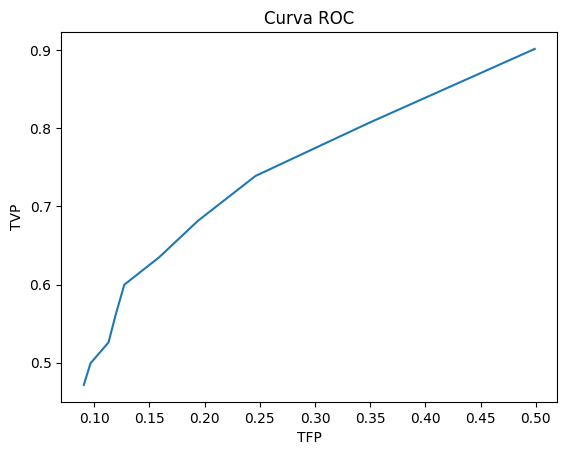

In [46]:
from re import escape
x = []
y = []

for i in range(len(classes)):
  sensibilidade = results[i][2]
  escapecificidade = results[i][3]
  x.append(escapecificidade)
  y.append(sensibilidade)


plt.title('Curva ROC')
plt.xlabel('TFP')
plt.ylabel('TVP')
plt.plot(x, y)
plt.show()